## Описание проекта
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Нужно спланировать кампанию на 2017-й.

#### Описание данных
- 'Name' — название игры
- 'Platform' — платформа
- 'Year_of_Release' — год выпуска
- 'Genre' — жанр игры
- 'NA_sales' — продажи в Северной Америке (миллионы долларов)
- 'EU_sales' — продажи в Европе (миллионы долларов)
- 'JP_sales' — продажи в Японии (миллионы долларов)
- 'Other_sales' — продажи в других странах (миллионы долларов)
- 'Critic_Score' — оценка критиков (максимум 100)
- 'User_Score' — оценка пользователей (максимум 10)
- 'Rating' — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### 1. Первичное ознакомление с данными

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import pylab as pl
%matplotlib inline
data_games = pd.read_csv('/datasets/games.csv')

In [303]:
data_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [304]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [305]:
#для удобства приведем названия столбцов к нижнему регистру
data_games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [306]:
#выведем столбцы с количеством пропусков по убыванию
data_games.isnull().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
genre                 2
name                  2
other_sales           0
jp_sales              0
eu_sales              0
na_sales              0
platform              0
dtype: int64

In [307]:
#в колонке ['year_of_release'] 269 пропущенных значений. Количество не критичное, можно удалить
data_games.dropna(subset = ['year_of_release'], inplace = True)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null float64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [308]:
#навскидку посмотрим как распределены  нулевые строки по годам выпуска игр
data_games['rating'].isnull().groupby(data_games['year_of_release']).count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: rating, dtype: int64

In [309]:
#выведем строки, отфильтрованные по пропущенным значениям рейтинга и доходов с продаж меньше 1 млн.
data_games.loc[(data_games['rating'].isnull()) & (data_games['na_sales'] <= 1) & (data_games['eu_sales'] <= 1) & (data_games['jp_sales'] <= 1) & (data_games['other_sales'] <= 1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Super Mario All-Stars: Limited Edition,Wii,2010.0,Platform,0.99,0.52,0.92,0.14,NaN,NaN,NaN
651,Dino Crisis,PS,1998.0,Action,0.81,0.76,0.70,0.14,NaN,NaN,NaN
731,The Legend of Zelda: Link's Awakening DX,GB,1998.0,Adventure,1.00,0.63,0.45,0.13,NaN,NaN,NaN
779,Golf,GB,1989.0,Sports,0.83,0.33,0.92,0.04,NaN,NaN,NaN
807,Mario & Luigi: Dream Team,3DS,2013.0,Role-Playing,0.89,0.58,0.46,0.14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [310]:
data_games.duplicated().sum()

0

In [311]:
#как пример возможных дубликатов по столбцу 'name'
data_games['name'].duplicated()
data_games.loc[16713:]
data_games.loc[data_games['name'] == 'Spirits & Spells']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15771,Spirits & Spells,GC,2003.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN


### - Выводы по результатам первичного знакомства с данными
#### Общее описание
- Таблица data_games состоит из 16715 строк и 11 столбцов.
- В 4-х столбцах содержатся котегориальные переменные: название игры ('name'), название платформы ('platform'), жанр ('genre') и рейтинг ('rating'). Столбец с рейтингом имеет буквенную обозначение градации присвоенного рейтинга. Остальные столбцы содержат количественные переменные.

#### Типы данных
В столбце 'year_of_release' неверно отражен тип данных. Необходимо привести к временному типу datetime и целочисленному значению. В остальном типы данных можно считать корректными.

#### Пропуски
В шести столбцах содержатся пропуски, однако для рассмотрения критичными по количеству являются столбцы: 1) 'critic_score'  -   8578;  2) 'rating' - 6766; 3) 'user_score' - 6701. Как видим, количество пропусков в столбце 'user_score' по количеству практически совпадает с 'rating'.

Пропуски с столбце с рейтингом 'rating' частично могли бы объясняться тем, что на момет сбора данных некоторым играм рейтинг еще не был присвоен. В этом случае, по правилам ESRB, за такими играми сохраняется статус 'Rating Pending' до момента присвоения (https://www.esrb.org/ratings-guide/). Однако доля пропущенных значений, приходящихся на 2016 г. достаточно мала и пропуски встречаются и за более ранние года. Срез данных показал, что пропущенные значения в колонках с рейтингом и оценками, как правило, приходятся на те игры, доходы от продаж которых меньше 1 млн. долл.

В связи с этим можно предположить, что игры с низкими продажами не представляют инереса для критиков и прочих присвоителей рейтингов, и, следовательно, пропущенные заначения нельзя заполнить по причине отсутствия у таких рейтингов в принципе. Другим решением может быть замена пропущенных значений на низкие значения оценок, так как подобные игры вряд ли можно назвать популярными, однако такой путь вряд ли можно признать правильным.

#### Дубликаты

Проверка показала отсутствие полных дубликатов в таблице (совпадения строк полностью). Однако дубликаты могут присутствовать  неявно - например, в отображении названия игр в различных форматах, регистрах и тд.

#### Другие проблемы

В столбце 'user_score' присутствует значение 'tbd', что означает to be defined, то есть игре еще не присвоен какой-либо рейтинг. Данный тип 'str' может быть проблемой при вычислениях. Мы его заменим на NaN. В любом случае какой-либо смысловой нагрузки он не несет.



### 2. Подготовка данных. Предобработка

In [312]:
#заменим тип данных в столбце ['year_of_release']
data_games['year_of_release'] = pd.to_datetime(data_games['year_of_release'], format='%Y').dt.strftime('%Y')
data_games['year_of_release'] = pd.to_datetime(data_games['year_of_release'], format='%Y')
#приведем к численному значению столбец ['user_score'], заменив при этом 'tbd' на нулевые значения
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

In [313]:
data_games['user_score'].value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
9.6      2
0.6      2
1.9      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [314]:
#приведем к нижнему регистру следующие столбцы
data_games['name'] = data_games['name'].str.lower()
data_games['genre'] = data_games['genre'].str.lower()
data_games['platform'] = data_games['platform'].str.lower()
#добавим новый столбец с общей суммой продаж ['total_sales']
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016-01-01,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006-01-01,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016-01-01,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003-01-01,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01



- Была проведена замена типа данных в столбце 'year_of_release' на тип datetime.
- В столбце 'user_score' была обнаружена оценка в виде tbd. В сфере игр данная аббревиатура означает 'to be determined', то есть ретйнг (скоринг) на момент сбора данных, по-видимому, еще не был присвоен. Была проведена замена на NaN.
- Столбцы 'name', 'genre' и 'platform' были приведены к нижнему регистру.
- Замена пропусков или удаление таких строк не были признаны необходимыми.

In [315]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null datetime64[ns]
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
total_sales        16446 non-null float64
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 2.3+ MB


### 3. Исследовательский анализ данных

#### 3.1 Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

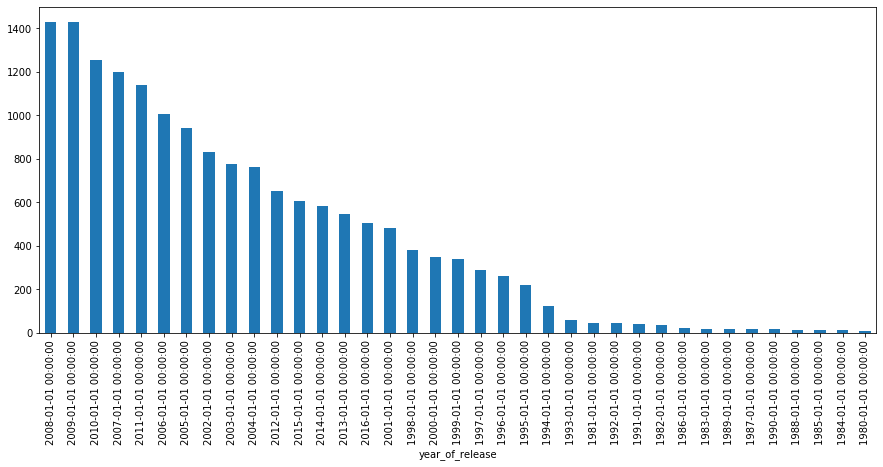

In [316]:
#сгруппируем количество игр по годам
data_games.groupby('year_of_release')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15, 6))

In [317]:
#оставим только игры, выпущенные после 1995 г
data_games = data_games.query('year_of_release > "1995-01-01"')

- Как видим, продажи ранее 1994 г. были совсем небольшими. Хоть сколько-нибудь существенные показатели начинаются лишь с 1995 г.



#### 3.2 Как менялись продажи по платформам?
- Выбрать платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

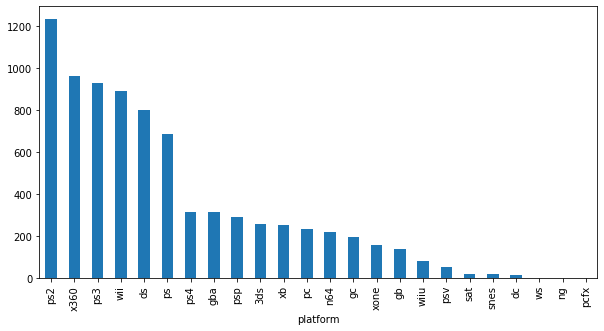

In [318]:
data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

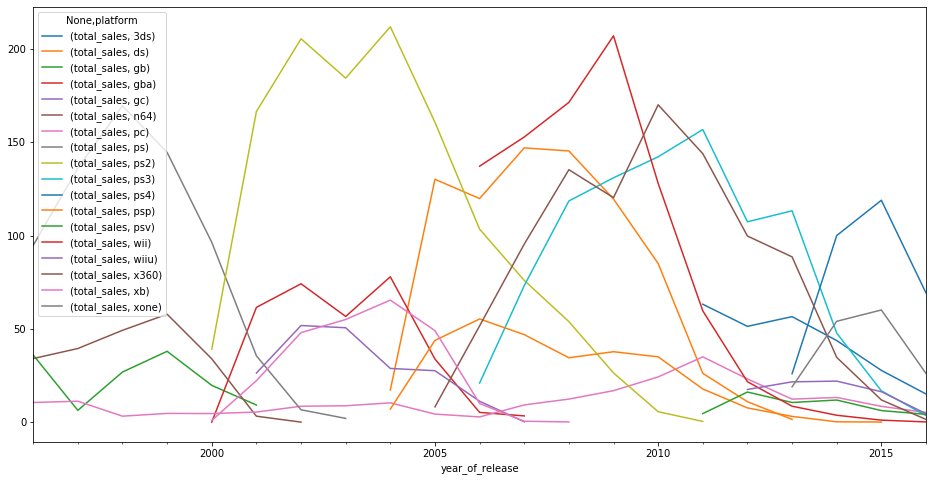

In [319]:
#саггрегируем в таблицу суммарные продажи по платформама и годам выпуска
platforms_sales_agg = data_games.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
#выделим топ-10 платформ
top_platforms_by_sales = data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(18)
#сохраним в список топ-18 платформ
top_platforms = top_platforms_by_sales.index.to_list()
#отфильтруем данные по топ-10 платформам через список и построим график
platforms_sales_agg = platforms_sales_agg.loc[platforms_sales_agg.index.isin(top_platforms, level=0)]
platforms_sales_agg.unstack(level=0).plot(figsize=(16, 8)) 

Как можно видеть из графика:
- Самой стабильной платформой для продаж игр является персональный компьютер (pc).
- Срок "жизни" же остальных платформ составляет около 6 лет. 



#### 3.3 Определение актуального периода. Основной фактор — эти данные помогут построить прогноз на 2017 год

In [320]:
#в качестве актуального периода возьмем данные, начиная с 2006 г. 
#На этот год приходится пики продаж основных платформ, которые тем или иным образом "дожили" до 2016 г. - типичный срок. 

good_data = data_games.loc[data_games['year_of_release'] >= '2006-01-01']
good_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,ds,2006-01-01,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006-01-01,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,score international baja 1000: the official game,ps2,2008-01-01,racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,samurai warriors: sanada maru,ps3,2016-01-01,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006-01-01,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016-01-01,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


#### 3.4 Какие платформы лидируют по продажам, растут или падают? 
- Выбрать несколько потенциально прибыльных платформ

In [321]:
#выделим потенциально прибыльные платформы
major_platforms_list = ['ps4', 'ps3', 'x360', 'pc', 'wii', 'ds', 'xone']
good_data = good_data.loc[good_data['platform'].isin(major_platforms_list)]

- По продажам лидируют ps3, x360, wii, xone.
- К началу 2017 г. можно отметить общий тренд продажи на всех платформах.
- Однако в целом по объемам продаж можно выделить следуюшие потенциально прибыльные платформы: ps4, ps3, x360, pc, wii, ds, xone



#### 3.5 Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 
- Велика ли разница в продажах? А в средних продажах на разных платформах? Описать результат.

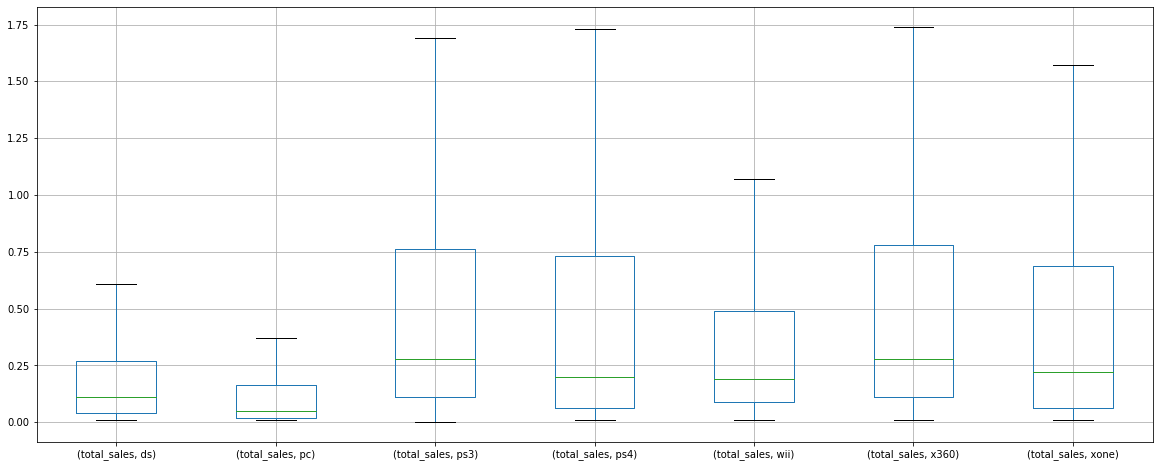

In [322]:
#создадим сводную таблицу и сгруппируем глобальные продажи по играм на платформах

major_platforms_sales = good_data.pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum')
major_platforms_sales.unstack(level=0).boxplot(figsize=(20, 8), showfliers=False) 

- Лидерами по "выбросам" и сборам в глобальных продажах являются платформы "wii" и "x360", "ps3", "ps4" и "xone".
- На "pc" и "ds" продажи скромнее всего.
- Равные средние показатели наблюдаются у пар "x360" и "ps3", а также у "wii" и "ps4". 
- "Xone" находится посередине между этими двумя парами.



#### 3.6 Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.


Коэффициент корреляции критических отзывов и продаж: 0.4327589578997135
Коэффициент корреляции оценок пользователей и продаж: 0.12841562938563028


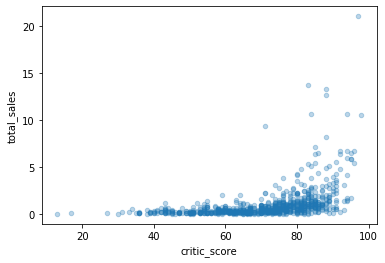

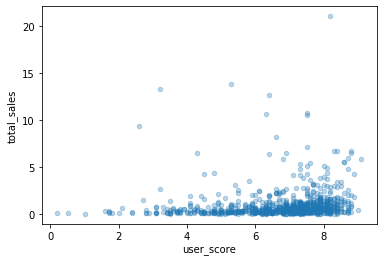

In [323]:
#в качестве примера возьмем платформу ps3
print('Коэффициент корреляции критических отзывов и продаж:', good_data.query('platform == "ps3"')['critic_score'].corr(good_data.query('platform == "ps3"')['total_sales']))
print('Коэффициент корреляции оценок пользователей и продаж:', good_data.query('platform == "ps3"')['user_score'].corr(good_data.query('platform == "ps3"')['total_sales']))
good_data.query('platform == "ps3"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
plt.show()
good_data.query('platform == "ps3"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)


- Коэффициэнт корреляции отзывов критиков и глобальных имеет на платформе ps3 положительное значение и составляет почти 0.43. Дастаточно устойчивая корреляция по сравнению с отзывами пользователей (0.11) - то есть корреляция выше в 4 раза.
- Возможно, мнения критиков имеют определенное влияние на показатели продаж.

Коэффициент корреляции критических отзывов и продаж: 0.1779072857759491
Коэффициент корреляции оценок пользователей и продаж: 0.11283121360773772


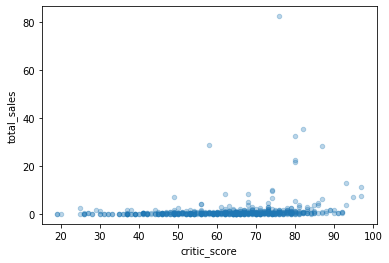

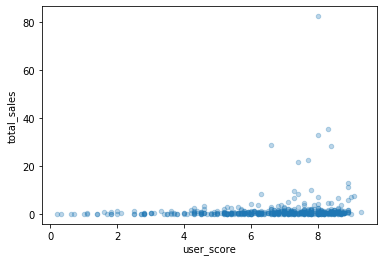

In [324]:
#проверим корреляцию на платформе wii
print('Коэффициент корреляции критических отзывов и продаж:', good_data.query('platform == "wii"')['critic_score'].corr(good_data.query('platform == "wii"')['total_sales']))
print('Коэффициент корреляции оценок пользователей и продаж:', good_data.query('platform == "wii"')['user_score'].corr(good_data.query('platform == "wii"')['total_sales']))
good_data.query('platform == "wii"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
plt.show()
good_data.query('platform == "wii"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)


- На платформе wii отзывы критиков меньше влияют на продажи.

Коэффициент корреляции критических отзывов и продаж: 0.2869193299236143
Коэффициент корреляции оценок пользователей и продаж: -0.020555707172675495


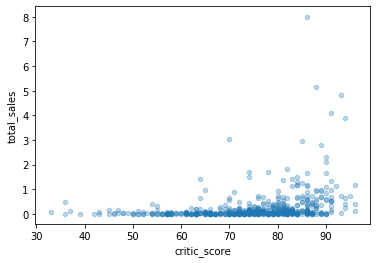

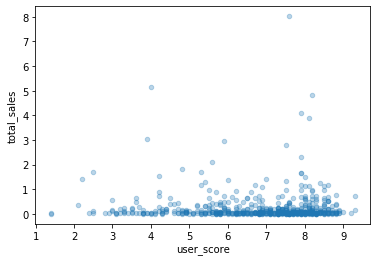

In [325]:
#проверим корреляцию на платформе pc
print('Коэффициент корреляции критических отзывов и продаж:', good_data.query('platform == "pc"')['critic_score'].corr(good_data.query('platform == "pc"')['total_sales']))
print('Коэффициент корреляции оценок пользователей и продаж:', good_data.query('platform == "pc"')['user_score'].corr(good_data.query('platform == "pc"')['total_sales']))
good_data.query('platform == "pc"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
plt.show()
good_data.query('platform == "pc"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)

- На pc отзывы критиков и пользователей соотносятся с продажами совсем по-разному. У отзывов пользователей даже небольшая отрицательная корреляция с продажами.



#### 3.7 Посмотреть на общее распределение игр по жанрам
- Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

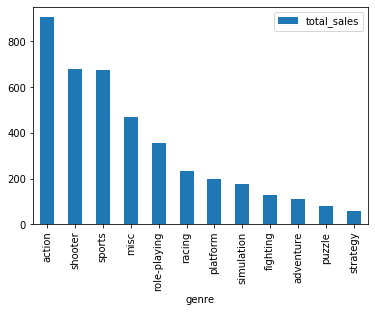

In [326]:
#посмотрим как распределены продажи по жанрам
good_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar')

- Самыми прибыльными жанрами являются: action, shooter и sports.
- Меньше всего разработчики игр зарабатывают на strategy, puzzle и adventure.



### 4. Составить портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы (топ-5)

In [327]:
#топ 5 платформ NA
na_platform_ratio = good_data.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_platform_ratio = na_platform_ratio.nlargest(5, ['na_sales']) 
na_platform_ratio['ratio'] = na_platform_ratio['na_sales'] / na_platform_ratio['total_sales']
na_platform_ratio

,na_sales,total_sales,ratio
platform,,,
x360,588.84,952.99,0.617887
wii,486.87,891.18,0.546321
ps3,390.13,931.34,0.418891
ds,323.99,655.35,0.494377
ps4,108.74,314.14,0.346151


In [328]:
#топ 5 платформ EU
eu_platform_ratio = good_data.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_platform_ratio = eu_platform_ratio.nlargest(5, ['eu_sales']) 
eu_platform_ratio['ratio'] = eu_platform_ratio['eu_sales'] / eu_platform_ratio['total_sales']
eu_platform_ratio

,eu_sales,total_sales,ratio
platform,,,
ps3,327.21,931.34,0.351332
x360,267.89,952.99,0.281105
wii,258.32,891.18,0.289863
ds,142.99,655.35,0.218189
ps4,141.09,314.14,0.449131


In [329]:
#топ 5 платформ JP
jp_platform_ratio = good_data.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_platform_ratio = jp_platform_ratio.nlargest(5, ['jp_sales']) 
jp_platform_ratio['ratio'] = jp_platform_ratio['jp_sales'] / jp_platform_ratio['total_sales']
jp_platform_ratio

,jp_sales,total_sales,ratio
platform,,,
ds,141.49,655.35,0.215900
ps3,79.41,931.34,0.085264
wii,68.28,891.18,0.076618
ps4,15.96,314.14,0.050805
x360,12.02,952.99,0.012613


- Из анализа популярности платформ по регионам можно увидеть, что третье место везде делит платформа "wii". По отношению к глобальным продажам выше всего ее доля в Северной Америке, а ниже всего - в Японии.
- Платформа "x360" популярнее всего в Северной Америке, и на нее же там приходится большая доля в глобальных продажах. В Европе данная платформа тоже очень популярна, однако уступает место ps 3.
- PC имеет распространение только в Европе. В Северной Америке и Японии в основном играют только в консоли.

#### Самые популярные жанры (топ-5)

In [330]:
#топ 5 жанров NA
na_genre_ratio = good_data.pivot_table(index='genre', values=['na_sales', 'total_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_genre_ratio = na_genre_ratio.nlargest(5, ['na_sales']) 
na_genre_ratio['ratio'] = na_genre_ratio['na_sales'] / na_genre_ratio['total_sales']
na_genre_ratio


,na_sales,total_sales,ratio
genre,,,
action,445.38,906.14,0.491513
shooter,354.01,677.67,0.522393
sports,346.65,675.89,0.512879
misc,254.18,469.72,0.541131
role-playing,155.53,356.01,0.436870


In [331]:
#топ 5 жанров EU
eu_genre_ratio = good_data.pivot_table(index='genre', values=['eu_sales', 'total_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_genre_ratio = eu_genre_ratio.nlargest(5, ['eu_sales']) 
eu_genre_ratio['ratio'] = eu_genre_ratio['eu_sales'] / eu_genre_ratio['total_sales']
eu_genre_ratio

,eu_sales,total_sales,ratio
genre,,,
action,302.46,906.14,0.333789
shooter,228.93,677.67,0.337819
sports,225.48,675.89,0.333605
misc,127.38,469.72,0.271183
racing,92.91,231.05,0.402121


In [332]:
#топ 5 жанров JP
jp_genre_ratio = good_data.pivot_table(index='genre', values=['jp_sales', 'total_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_genre_ratio = jp_genre_ratio.nlargest(5, ['jp_sales']) 
jp_genre_ratio['ratio'] = jp_genre_ratio['jp_sales'] / jp_genre_ratio['total_sales']
jp_genre_ratio


,jp_sales,total_sales,ratio
genre,,,
role-playing,81.24,356.01,0.228196
action,54.43,906.14,0.060068
misc,46.88,469.72,0.099804
sports,32.88,675.89,0.048647
platform,24.40,196.90,0.123921


- В Америке и Европе по убывания одинаково идут action, shooter, sports и misc. Но в Америке для всех этих жанров доля в глобальных продажах выше.
- Европа опять отличилась своим уникальным жанром - racing. В Америке и Японии он не входит в топ-5.
- В Японии на первом месте жанр ролевых игр, который в Америке занимает последее место (а в Европе его нет в топ-5).

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

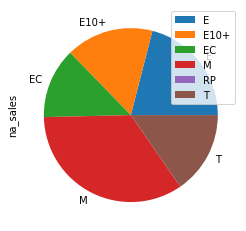

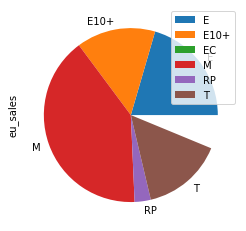

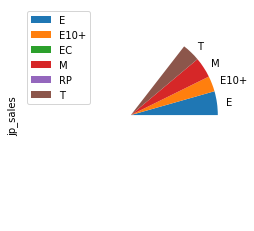

In [333]:

plt.show()
good_data.groupby('rating')['na_sales'].mean().plot(kind='pie', legend='na')
plt.show()
good_data.groupby('rating')['eu_sales'].mean().plot(kind='pie', legend='eu')
plt.show()
good_data.groupby('rating')['jp_sales'].mean().plot(kind='pie', legend='jp')

- Во всех регионах выше всего продажи игр с рейтингом "М" - для взрослых.
- В Японии популярны игры для подростков от 13 лет ("Т").
- В Америке, в отличие от остальных регионов, в ходу игры для детей раннего возраста ("EC").




### 5. Проверить гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
Для проверки гипотез проверим тест Стьюдента.
- Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC равны".
- Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

In [334]:
#сохраним данные о пользовательских рейтингах в соответствующих переменных
xbox_user_score = data_games.query('platform == "xone"')['user_score'].dropna()
pc_user_score = data_games.query('platform == "pc"')['user_score'].dropna()

#посмотрим дисперсии выборок
print('Дисперсия пользовательсеого рейтинга Xone:', xbox_user_score.var())
print('Дисперсия пользовательсеого рейтинга PC:', pc_user_score.var())

alpha = 0.05 

compare_scores = st.ttest_ind(xbox_user_score, pc_user_score, equal_var=False)

print('p-значение:', compare_scores.pvalue)

if (compare_scores.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия пользовательсеого рейтинга Xone: 1.9069968429360695
Дисперсия пользовательсеого рейтинга PC: 2.3231900019831713
p-значение: 3.442937492775816e-06
Отвергаем нулевую гипотезу


- Как видим, значение p-value крайне мало. Следовательно, вероятность близости средних генеральных совокупностей пользовательских оценок по их выборкам очень мала.

#### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные?
- Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports равны".
- Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports различаются".

In [335]:
#сохраним данные о пользовательских рейтингах в соответствующих переменных
action_user_score = data_games.query('genre == "action"')['user_score'].dropna()
sports_user_score = data_games.query('genre == "sports"')['user_score'].dropna()

print('Дисперсия пользовательского рейтинга жанра "action":', action_user_score.var())
print('Дисперсия пользовательского рейтинга жанра "sports":', sports_user_score.var())

compare_scores_genres = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

print('p-значение:', compare_scores_genres.pvalue)

if (compare_scores_genres.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия пользовательского рейтинга жанра "action": 2.027493768262496
Дисперсия пользовательского рейтинга жанра "sports": 2.623055812519272
p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


- Высока вероятность того средние пользовательские рейтинги жанров Action и Sports равны.



### Общие выводы

#### Рынок платформ
- По размеру рынка и объемам продаж лидируют следующие платформы:  ps3, x360 и wii. Однако по всем платформам наблюдаются нисходящие тренды. Новая консоль ps4 только входит на рынок и объемы продаж игр на ней еще не большие по сравнению с другими платформами.

- Лидерами по "выбросам" и сборам в глобальных продажах являются платформы "wii" и "x360" и "ps3". На "pc" продажи продажи скромнее всего, но это самая стабильная платформа. Средние же показатели по продажам не почти не отличаются на различных платформах.

#### Влияние рейтингов и отзывов

- Хорошие отзывы критиков, как правило, означают большой спрос на игры. Например, у ps3 коэффициент корреляции критических отзывов и продаж: 0.4337315172826896.
- Оценки пользователей слабо коррелируют с объемами продаж, или даже может быть отрицательным (pc).

#### Жанры
- Самыми прибыльными жанрами являются: action, shooter и sports.
- Меньше всего разработчики игр зарабатывают на strategy, puzzle и adventure.

### Региональные особенности

#### Виды платформ
- Платформа "x360" популярнее всего в Северной Америке, и на нее же там приходится большая доля в глобальных продажах. В Европе данная платформа тоже очень популярна, однако уступает место ps 3.
- PC имеет распространение только в Европе. В Северной Америке и Японии в основном играют только в консоли.
- Третье место везде делит платформа "wii". По отношению к глобальным продажам выше всего ее доля в Северной Америке, а ниже всего - в Японии.

#### Жанры

- В Америке и Европе по убывания одинаково идут action, shooter, sports и misc. Но в Америке для всех этих жанров доля в глобальных продажах выше.
- Европа опять отличилась своим уникальным жанром - racing. В Америке и Японии он не входит в топ-5.
- В Японии на первом месте жанр ролевых игр, который в Америке занимает последее место (а в Европе его нет в топ-5).

#### Рейтинги

- Во всех регионах выше всего продажи игр с рейтингом "М" - для взрослых.
- В Японии популярны игры для подростков от 13 лет ("Т").
- В Америке, в отличие от остальных регионов, в ходу игры для детей раннего возраста ("EC").

#### Выводы по гипотезам

- Пользователи одинаково любят жанры Action и Sports.
- Пользователи по-разному оценивают игры на PC и Xbox One.

#### Успешными играми могут быть
- На платфомах  ps3, x360 и wii, xone
- В жанрах action, shooter, sports и misc, racing - для Европы и Северной Америки. Для Японии также - role playing.
- С рейтингами М, EC.
- С высокими оценками от критиков
